#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


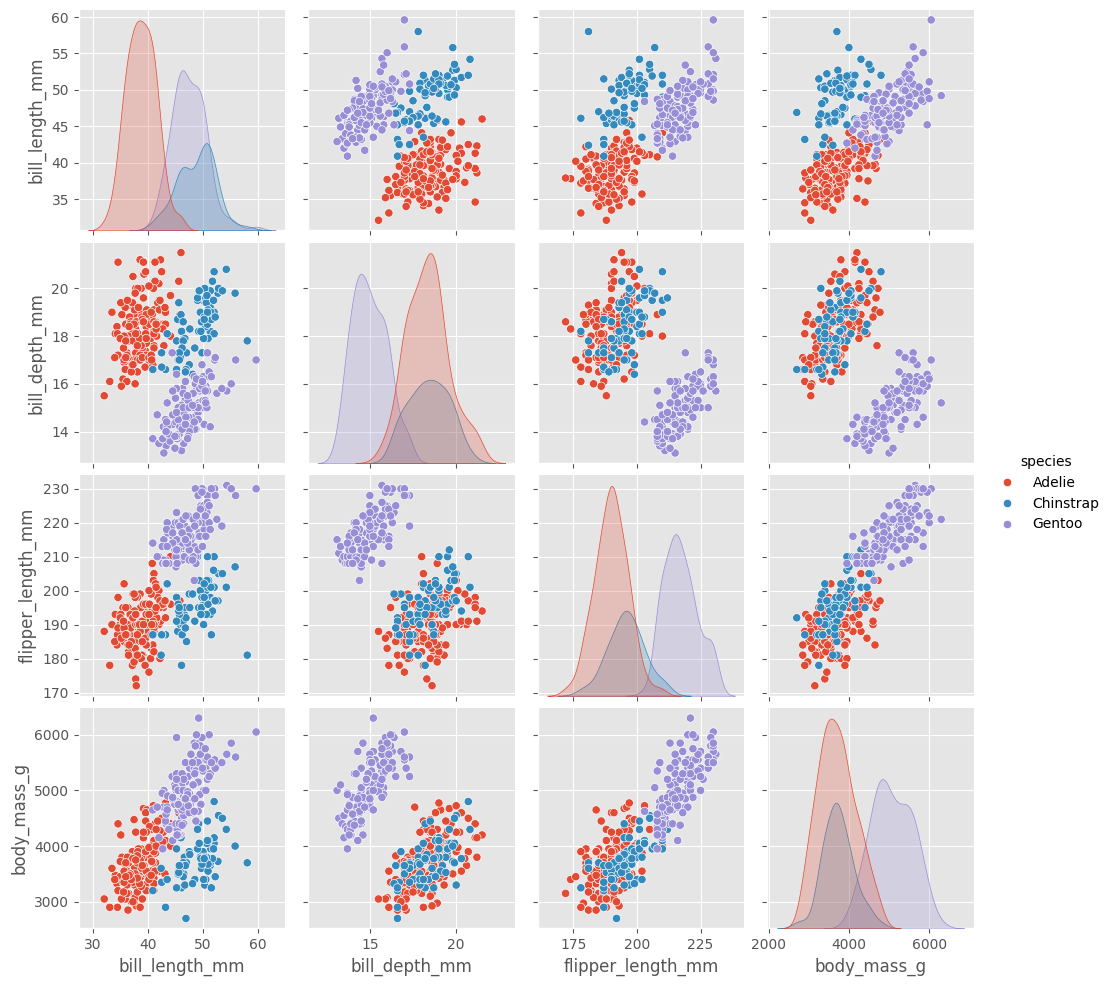

In [51]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

1. Примените K-Means к набору данных пингвины.

In [53]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [59]:
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins)

Признаки, которые будут использоваться для кластеризации. Например, можно использовать длину и массу клюва

In [76]:
features = ["bill_length_mm", "bill_depth_mm"]
X = penguins[features]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


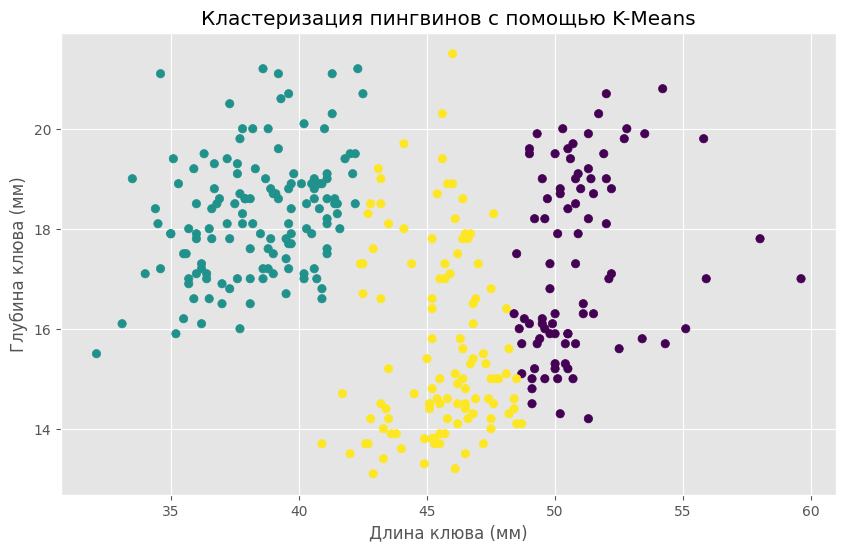

In [79]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
penguins['cluster'] = kmeans.labels_

plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=penguins['cluster'])
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Глубина клюва (мм)')
plt.title('Кластеризация пингвинов с помощью K-Means')
plt.show()

2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


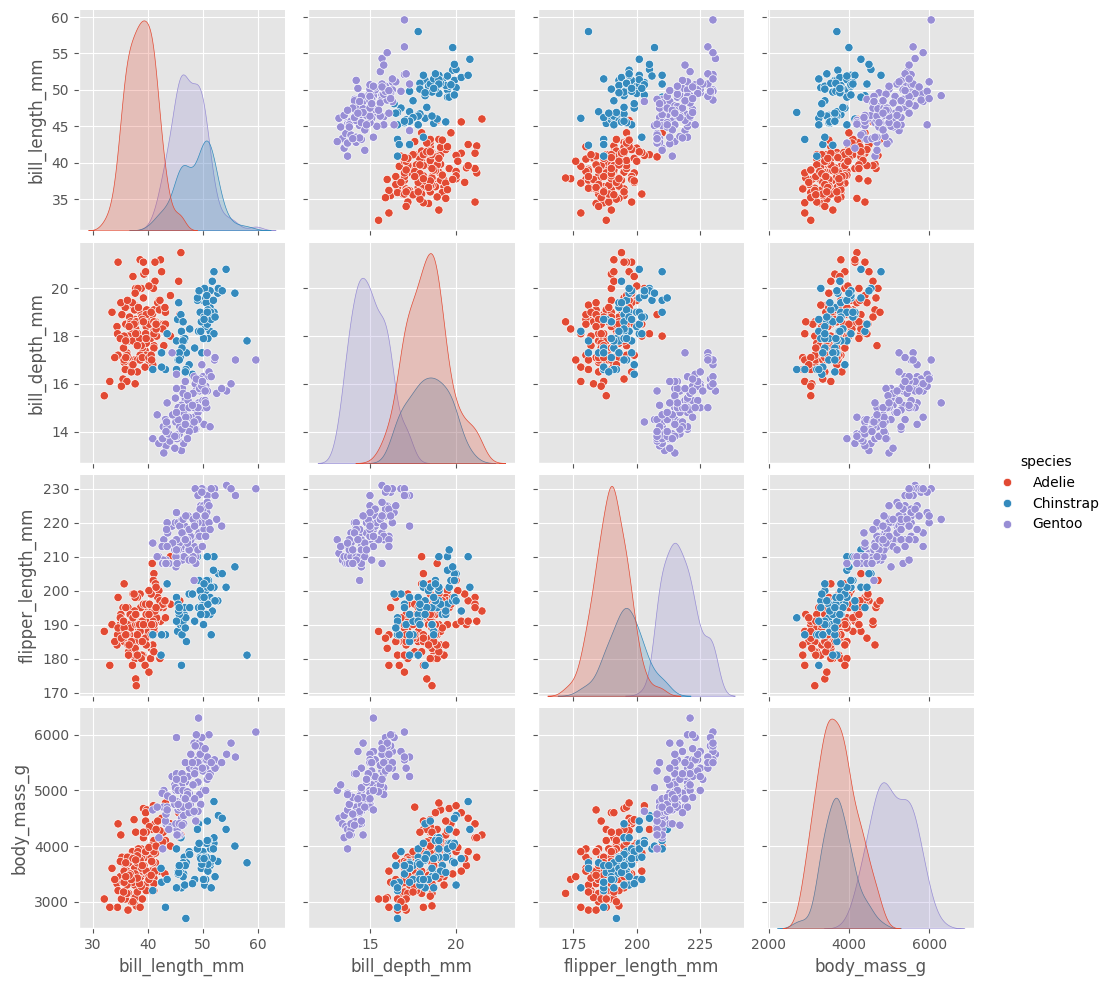

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

penguins = sns.load_dataset("penguins")

# Очистка данных
penguins = penguins.dropna()

# Выбор признаков для кластеризации (например, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g)
features = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# Кластерный анализ
kmeans = KMeans(n_clusters=3)  # Предполагаем 3 кластера, основываясь на значениях k-means в задании 1.
penguins["cluster"] = kmeans.fit_predict(features)

# Построение pairplot с метками кластеров
grid = sns.pairplot(penguins, hue="species", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
plt.show()

3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

In [92]:
labels = kmeans.labels_

In [95]:
homogeneity = metrics.homogeneity_score(penguins['species'], labels)
completeness = metrics.completeness_score(penguins['species'], labels)
v_measure = metrics.v_measure_score(penguins['species'], labels)

In [98]:
print(f"Однородность: {homogeneity}")
print(f"Полнота: {completeness}")
print(f"V-мера: {v_measure}")

Однородность: 0.40577509655440835
Полнота: 0.41425780743633583
V-мера: 0.4099725779120541
